# Programiranje: skriptni jezici

## SMS Spam Collection dataset

Ovaj projekt će se temeljiti na testiranju različitih modela strojnog učenja na SMS Spam Collection setu podataka. <br>
Sljedeći kod uključuje nekoliko osnovnih koraka koji se provode prilikom implementacije i testiranja različitih modela 
strojnog učenja. <br>
**Koraci koji će se obaviti prilikom rada na zadanom problemu su:** <br>
    <ol>
      <li>Učitavanje i prikaz podataka</li>
      <li>Trend i prilagodba podataka</li>
      <li>Implementacija i treniranje različitih modela</li>
      <li>Testiranje modela</li>
    <li>Usporedba algoritama</li>
    </ol>

## Učitavanje programskih knjižnica i alata

In [1]:
# učitavanje potrebnih programskih knjižnica

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import nltk 
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from collections import Counter

from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score, roc_curve, roc_auc_score, auc
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

## Učitavanje i prikaz podataka

In [2]:
columns = ['label', 'message']

df = pd.read_csv('SMSSpamCollection', sep='\t', header=None, names=columns)

In [3]:
df.head(10)

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
5,spam,FreeMsg Hey there darling it's been 3 week's n...
6,ham,Even my brother is not like to speak with me. ...
7,ham,As per your request 'Melle Melle (Oru Minnamin...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...


In [4]:
df.shape

(5572, 2)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    5572 non-null   object
 1   message  5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [6]:
df.isnull().sum()

label      0
message    0
dtype: int64

In [7]:
df.describe()

,label,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [8]:
label_counts = df['label'].value_counts()

print(label_counts)

label
ham     4825
spam     747
Name: count, dtype: int64


Text(0.5, 0, 'Target class')

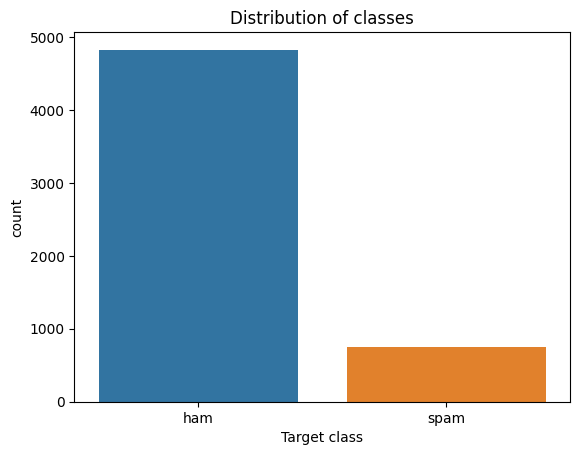

In [9]:
df['label'].value_counts() #omjer pozitivnih i negativnih ishoda
sns.countplot(x=df['label'], hue=df['label'])
plt.title('Distribution of classes')
plt.xlabel('Target class')

In [10]:
df = df.drop_duplicates(keep='first')

In [11]:
df.shape

(5169, 2)

## Ekstrakcija značajki s NLP tehnikom i nltk programskom knjižnicom

In [12]:
#nova značajka - broj slova unutar poruke 
df['num_characters'] = df['message'].apply(len)

In [13]:
df.head()

,label,message,num_characters
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [14]:
df['message'].apply(lambda x : nltk.word_tokenize(x))

0       [Go, until, jurong, point, ,, crazy, .., Avail...
1                [Ok, lar, ..., Joking, wif, u, oni, ...]
2       [Free, entry, in, 2, a, wkly, comp, to, win, F...
3       [U, dun, say, so, early, hor, ..., U, c, alrea...
4       [Nah, I, do, n't, think, he, goes, to, usf, ,,...
                              ...                        
5567    [This, is, the, 2nd, time, we, have, tried, 2,...
5568      [Will, ü, b, going, to, esplanade, fr, home, ?]
5569    [Pity, ,, *, was, in, mood, for, that, ., So, ...
5570    [The, guy, did, some, bitching, but, I, acted,...
5571                  [Rofl, ., Its, true, to, its, name]
Name: message, Length: 5169, dtype: object

In [15]:
df['num_words'] = df['message'].apply( lambda x : len(nltk.word_tokenize(x)) )

In [16]:
df.head()

,label,message,num_characters,num_words
0,ham,"Go until jurong point, crazy.. Available only ...",111,24
1,ham,Ok lar... Joking wif u oni...,29,8
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,ham,U dun say so early hor... U c already then say...,49,13
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,15


In [17]:
df['num_sentences'] = df['message'].apply(lambda x : len(nltk.sent_tokenize(x)))

In [18]:
df.head()

,label,message,num_characters,num_words,num_sentences
0,ham,"Go until jurong point, crazy.. Available only ...",111,24,2
1,ham,Ok lar... Joking wif u oni...,29,8,2
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,ham,U dun say so early hor... U c already then say...,49,13,1
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [19]:
df[df['label'] == 'ham'][['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.905890,17.267715,1.827724
std,56.715046,13.588065,1.394338
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,53.000000,13.000000,1.000000
75%,91.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [20]:
df[df['label'] == 'spam'][['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.704441,27.762634,2.986217
std,29.821348,6.993008,1.494815
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,148.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,223.000000,46.000000,9.000000


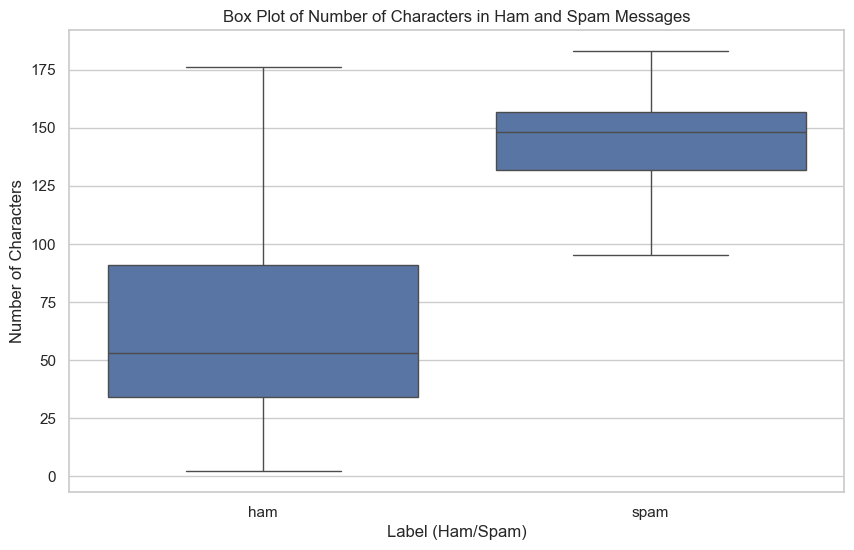

In [21]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

sns.boxplot(x="label", y="num_characters", data=df, showfliers=False)
plt.xlabel("Label (Ham/Spam)")
plt.ylabel("Number of Characters")
plt.title("Box Plot of Number of Characters in Ham and Spam Messages")

plt.show()

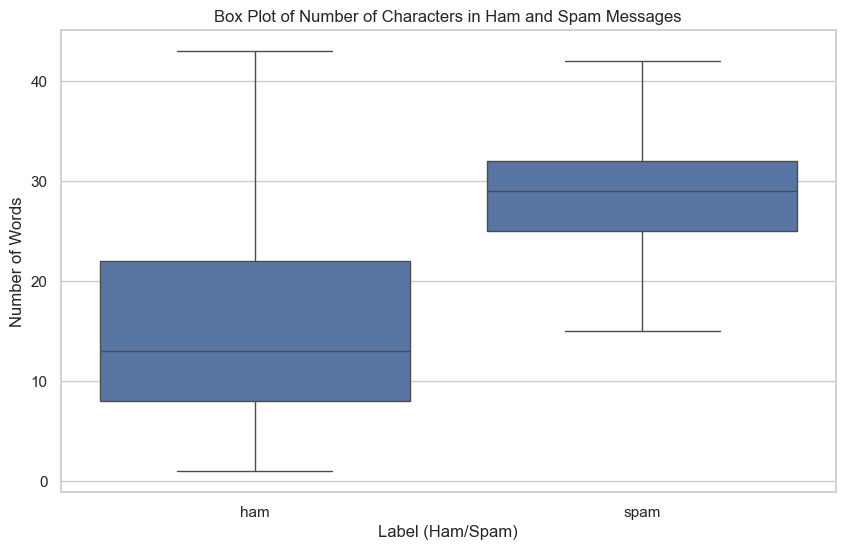

In [22]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

sns.boxplot(x="label", y="num_words", data=df, showfliers=False)
plt.xlabel("Label (Ham/Spam)")
plt.ylabel("Number of Words")
plt.title("Box Plot of Number of Characters in Ham and Spam Messages")

plt.show()

In [23]:
encoder = LabelEncoder()

df['label'] = encoder.fit_transform(df['label']) ## 1 za spam, 0 za non-spam

### Korelacijska matrica značajki

<Axes: >

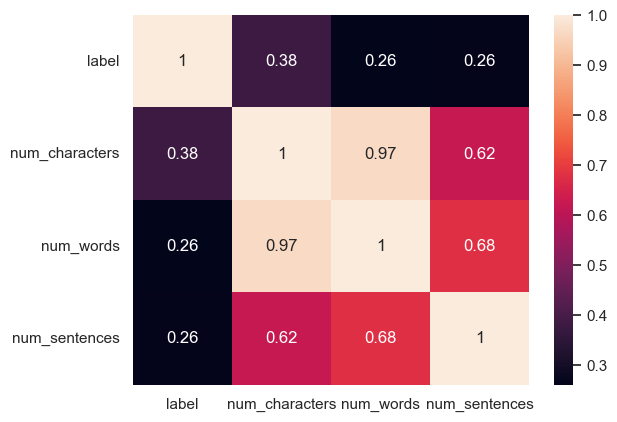

In [24]:
sns.heatmap(df[['label', 'num_characters', 'num_words', 'num_sentences']].corr(), annot = True)

## Priprema podataka za treniranje modela

In [25]:
def transform_message(message):
    
    message = message.lower()
    
    message = nltk.word_tokenize(message)
    
    bare_message = []
    
    for word in message:
        if word.isalnum():
            bare_message.append(word)
            
    removed_sw = []
            
    for word in bare_message:
        if word not in stopwords.words('english'):
            removed_sw.append(word)
            
    ps = PorterStemmer()
    
    res = []
    
    for word in removed_sw:
       res.append(ps.stem(word)) 
    
    res = " ".join(res)
    
    return res         

In [26]:
df['transformed_message'] = df['message'].apply(transform_message)

In [27]:
df.head()

,label,message,num_characters,num_words,num_sentences,transformed_message
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [28]:
spam_words = []

for message in df[df['label'] == 1]['transformed_message'].tolist():
    for word in message.split():
        spam_words.append(word)

In [29]:
word_counts = Counter()

for word in spam_words:
    word_counts[word] += 1

top_spam_words = word_counts.most_common(20)

df_spam_words = pd.DataFrame(top_spam_words, columns=['word', 'count'])

print(df_spam_words)

      word  count
0     call    320
1     free    191
2        2    155
3      txt    141
4     text    122
5        u    120
6       ur    119
7    mobil    114
8     stop    108
9    repli    103
10   claim     98
11       4     97
12   prize     82
13     get     74
14     new     64
15  servic     64
16    tone     63
17    send     61
18  urgent     58
19   nokia     57


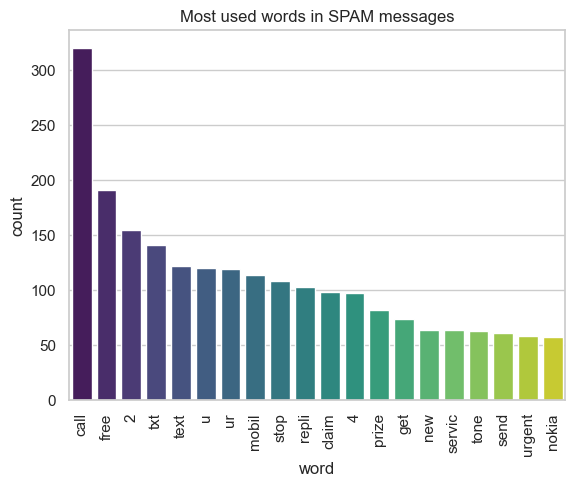

In [30]:
sns.barplot(data=df_spam_words, x='word', y = 'count', hue='word', palette='viridis')
plt.xticks(rotation = 'vertical')
plt.title('Most used words in SPAM messages')
plt.show()

In [31]:
nonspam_words = []

for message in df[df['label'] == 0]['transformed_message'].tolist():
    for word in message.split():
        nonspam_words.append(word)

In [32]:
from collections import Counter

word_counts = Counter()

for word in nonspam_words:
    word_counts[word] += 1

top_ham_words = word_counts.most_common(20)

df_ham_word = pd.DataFrame(top_ham_words, columns=['word', 'count'])

print(df_ham_word)

    word  count
0      u    897
1     go    407
2    get    351
3      2    288
4     gt    288
5     lt    287
6   come    278
7    got    239
8   know    237
9   like    236
10  call    235
11  love    222
12  time    220
13    ok    218
14  good    215
15  want    209
16    ur    203
17   day    195
18     ü    173
19  need    171


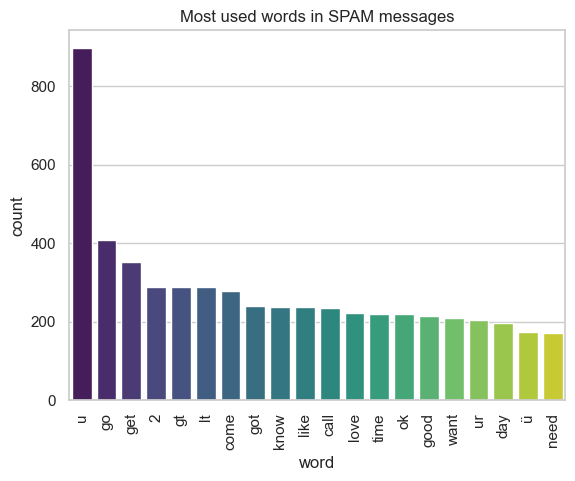

In [33]:
sns.barplot(data=df_ham_word, x='word', y = 'count',  hue='word', palette='viridis')
plt.xticks(rotation = 'vertical')
plt.title('Most used words in SPAM messages')
plt.show()

In [34]:
cv = CountVectorizer()

X = cv.fit_transform(df['transformed_message']).toarray()

X.shape

(5169, 6782)

In [35]:
unique_values, counts = np.unique(X, return_counts=True)

result_dict = dict(zip(unique_values, counts))

print(result_dict)

{0: 35015219, 1: 39212, 2: 1500, 3: 186, 4: 22, 5: 7, 6: 7, 8: 1, 10: 1, 15: 1, 18: 2}


In [36]:
y = df['label'].values

y.shape

(5169,)

Podjela podataka na trening set i set za testiranje.

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# Treniranje različitih modela na zadanom problemu

## Funkcija za ispis rezultata

In [38]:
scores = {}

In [39]:
roc_curves = {}

In [40]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, roc_auc_score
def print_result(model, y_test, y_probs_train, y_probs_test, y_predicted_train, y_predicted_test):
    print(f"{model}:")
    print("\n")
    
    print("Accuracy Score : ")
    accuracy_score1 = accuracy_score(y_test, y_predicted_test)
    print(accuracy_score1)
    print('*'*50)
    
    print("Precision Score : ")
    precision_score1= precision_score(y_test, y_predicted_test)
    print(precision_score1)
    print('*'*50)
    
    print("Recall Score : ")
    recall_score1 = recall_score(y_test, y_predicted_test)
    print(recall_score1)
    print('*'*50)
    
    print("F1 Score : ")
    f1_score1 = f1_score(y_test, y_predicted_test)
    print(f1_score1)
    print('*'*50)
    
    y_probs_train = y_probs_train[:, 1]
    y_probs_test = y_probs_test[:, 1]

    train_auc = roc_auc_score(y_train, y_probs_train)
    test_auc = roc_auc_score(y_test, y_probs_test)
    print('Train AUC: %.3f' % train_auc)
    print('Test AUC: %.3f' % test_auc)
    print('*'*50)
    
    train_fpr, train_tpr, train_thresholds = roc_curve(y_train, y_probs_train)
    test_fpr, test_tpr, test_thresholds = roc_curve(y_test, y_probs_test)
    plt.plot([0, 1], [0, 1], linestyle='--')

    plt.plot(train_fpr, train_tpr, marker='.', label='Train AUC')
    plt.plot(test_fpr, test_tpr, marker='.', label='Test AUC')
    plt.legend()
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve")
    plt.show()
    
    cma = confusion_matrix(y_test, y_predicted_test)
    print('Confusion matrix:\n', cma)
    df_cm = pd.DataFrame(cma, range(2), columns=range(2))
    plt.figure(figsize = (10,7))
    sns.heatmap(df_cm, annot=True,annot_kws={"size": 16}, fmt='g')
    
    scores[model] = [accuracy_score1, precision_score1, recall_score1, f1_score1, test_auc]
    roc_curves[model] = [test_fpr, test_tpr]

# Logistička regresija

In [41]:
parameters = {'C':[(10**i)*x for i in range(-4, 1) for x in [1,3,5]]}

model = LogisticRegression(class_weight='balanced')
clf = RandomizedSearchCV(model, parameters, cv=5, scoring='roc_auc', return_train_score=True, n_jobs=-1)
clf.fit(X_train, y_train)
print('Best parameters:  {}'.format(clf.best_params_))
print('Best score: {}'.format(clf.best_score_))

Best parameters:  {'C': 0.5}
Best score: 0.9824980592787936


Logistic Regression:


Accuracy Score : 
0.97678916827853
**************************************************
Precision Score : 
0.9393939393939394
**************************************************
Recall Score : 
0.8857142857142857
**************************************************
F1 Score : 
0.9117647058823529
**************************************************
Train AUC: 1.000
Test AUC: 0.986
**************************************************


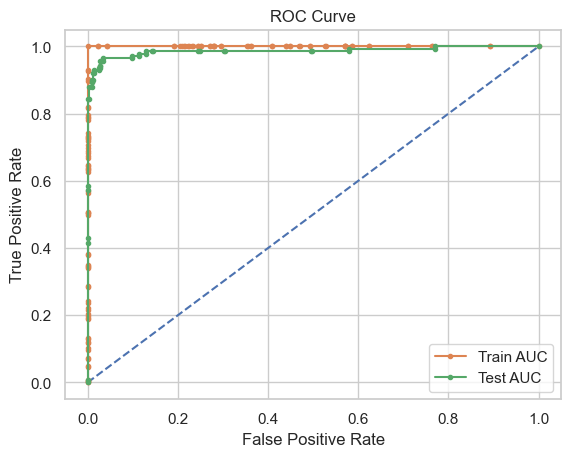

Confusion matrix:
 [[886   8]
 [ 16 124]]


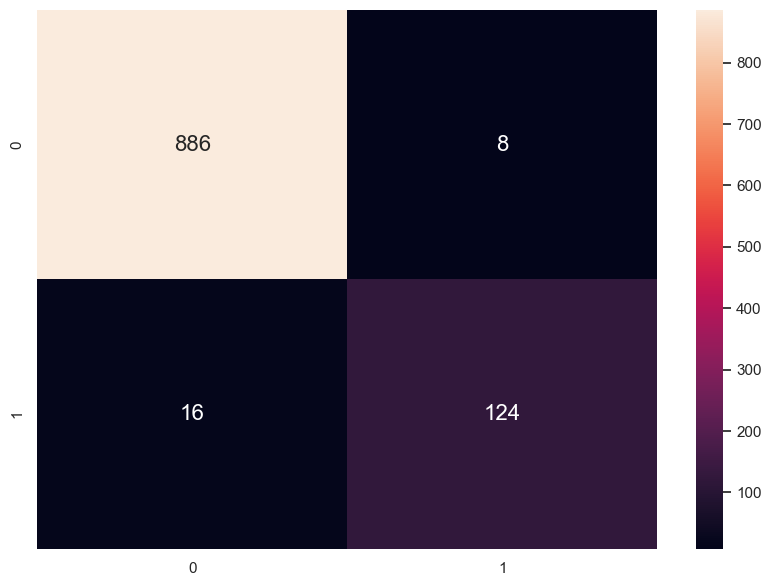

In [42]:
model = LogisticRegression(C=5, class_weight='balanced', n_jobs=-1)
model.fit(X_train, y_train)

y_probs_train = model.predict_proba(X_train)
y_probs_test = model.predict_proba(X_test)
y_predicted_train = model.predict(X_train)
y_predicted_test = model.predict(X_test)

print_result('Logistic Regression', y_test, y_probs_train, y_probs_test, y_predicted_train, y_predicted_test)

# KNN algoritam

### Optimizacija hiperparametara

In [43]:
pipeline_knn = Pipeline([
    ('scaler', StandardScaler()),
    ('knn', KNeighborsClassifier())
])

param_dist_knn = {
    'knn__n_neighbors': np.arange(1, 21), 
    'knn__weights': ['uniform', 'distance'],  
    'knn__metric': ['euclidean', 'manhattan', 'chebyshev']  
}

random_search_knn = RandomizedSearchCV(pipeline_knn, param_distributions=param_dist_knn, n_iter=10, cv=5, scoring='roc_auc', random_state=42)
random_search_knn.fit(X_train, y_train)

best_knn_model_rs = random_search_knn.best_estimator_

print("Best k-Nearest Neighbors Hyperparameters (Randomized Search):", random_search_knn.best_params_)

Best k-Nearest Neighbors Hyperparameters (Randomized Search): {'knn__weights': 'distance', 'knn__n_neighbors': 14, 'knn__metric': 'chebyshev'}


KNN:


Accuracy Score : 
0.8936170212765957
**************************************************
Precision Score : 
0.8947368421052632
**************************************************
Recall Score : 
0.24285714285714285
**************************************************
F1 Score : 
0.38202247191011235
**************************************************
Train AUC: 1.000
Test AUC: 0.703
**************************************************


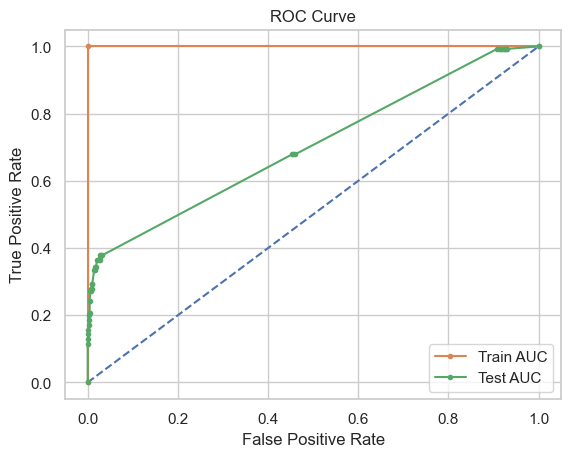

Confusion matrix:
 [[890   4]
 [106  34]]


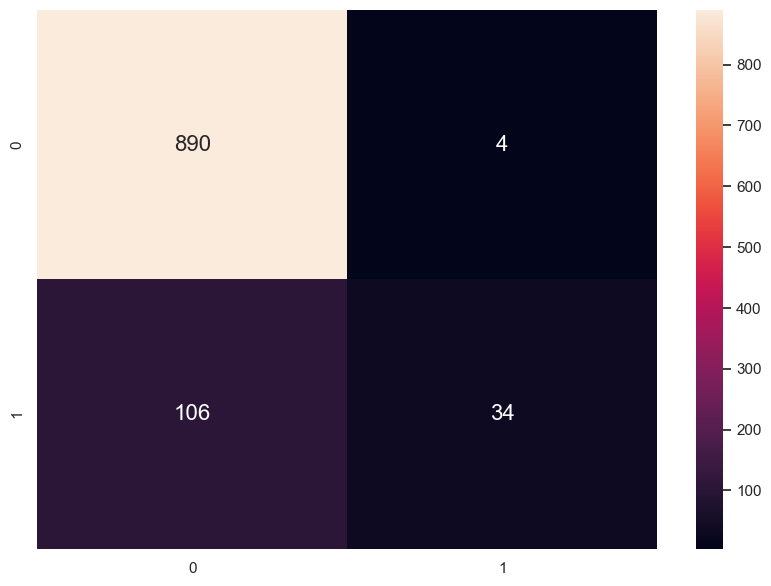

In [44]:
model = KNeighborsClassifier(n_neighbors=14, weights='distance', metric='chebyshev')
model.fit(X_train, y_train)

y_probs_train = model.predict_proba(X_train)
y_probs_test = model.predict_proba(X_test)
y_predicted_train = model.predict(X_train)
y_predicted_test = model.predict(X_test)

print_result('KNN', y_test, y_probs_train, y_probs_test, y_predicted_train, y_predicted_test)

# Stabla odluka

### Optimizacija hiperparametara

In [45]:
dt_model = DecisionTreeClassifier(random_state=42)

param_dist_dt = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

random_search_dt = RandomizedSearchCV(dt_model, param_distributions=param_dist_dt, n_iter=10, cv=5, scoring='accuracy', random_state=42)
random_search_dt.fit(X_train, y_train)

best_dt_model = random_search_dt.best_estimator_

print("Best Decision Tree Hyperparameters (Randomized Search):", random_search_dt.best_params_)

Best Decision Tree Hyperparameters (Randomized Search): {'splitter': 'random', 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 40, 'criterion': 'gini'}


DecisionTree:


Accuracy Score : 
0.9574468085106383
**************************************************
Precision Score : 
0.9
**************************************************
Recall Score : 
0.7714285714285715
**************************************************
F1 Score : 
0.8307692307692308
**************************************************
Train AUC: 0.987
Test AUC: 0.827
**************************************************


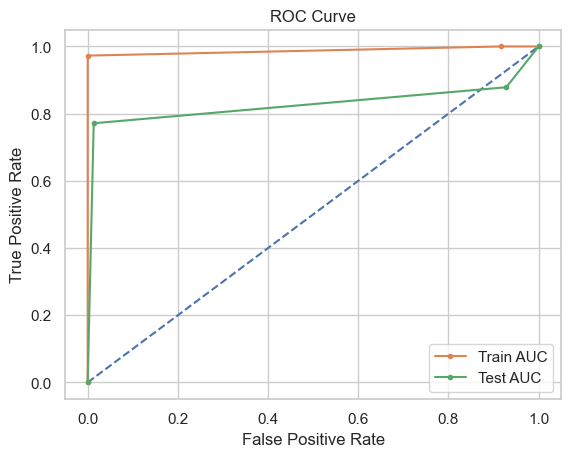

Confusion matrix:
 [[882  12]
 [ 32 108]]


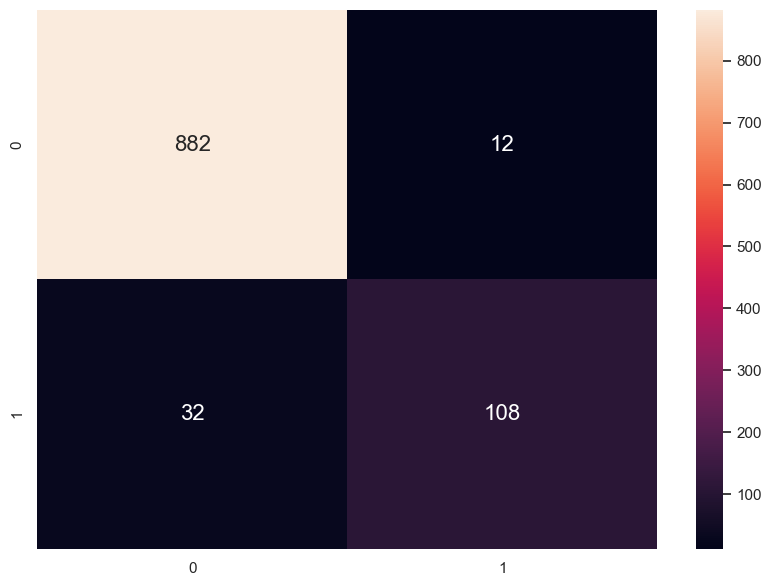

In [46]:
model = DecisionTreeClassifier(splitter='random', min_samples_split=2, min_samples_leaf=1, max_depth=40, criterion='gini')
model.fit(X_train, y_train)

y_probs_train = model.predict_proba(X_train)
y_probs_test = model.predict_proba(X_test)
y_predicted_train = model.predict(X_train)
y_predicted_test = model.predict(X_test)

print_result('DecisionTree',y_test, y_probs_train, y_probs_test, y_predicted_train, y_predicted_test)

# Random forest

### Optimizacija hiperparametara

In [47]:
params = {'n_estimators':[75, 100, 250, 500], 'max_depth':[3, 5, 10, 15, 25]}
model = RandomForestClassifier(class_weight='balanced', n_jobs=-1)
clf = RandomizedSearchCV(model, param_distributions=params, cv=5, scoring='roc_auc', random_state=42, n_jobs=-1, return_train_score=True)
clf.fit(X_train, y_train)
print('Best parameters:  {}'.format(clf.best_params_))
print('Best score: {}'.format(clf.best_score_))

Best parameters:  {'n_estimators': 250, 'max_depth': 25}
Best score: 0.9825324187646342


Random Forest:


Accuracy Score : 
0.971953578336557
**************************************************
Precision Score : 
0.9586776859504132
**************************************************
Recall Score : 
0.8285714285714286
**************************************************
F1 Score : 
0.8888888888888888
**************************************************
Train AUC: 0.995
Test AUC: 0.979
**************************************************


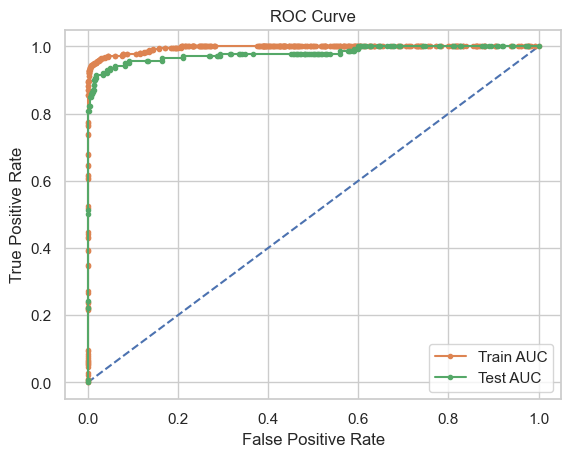

Confusion matrix:
 [[889   5]
 [ 24 116]]


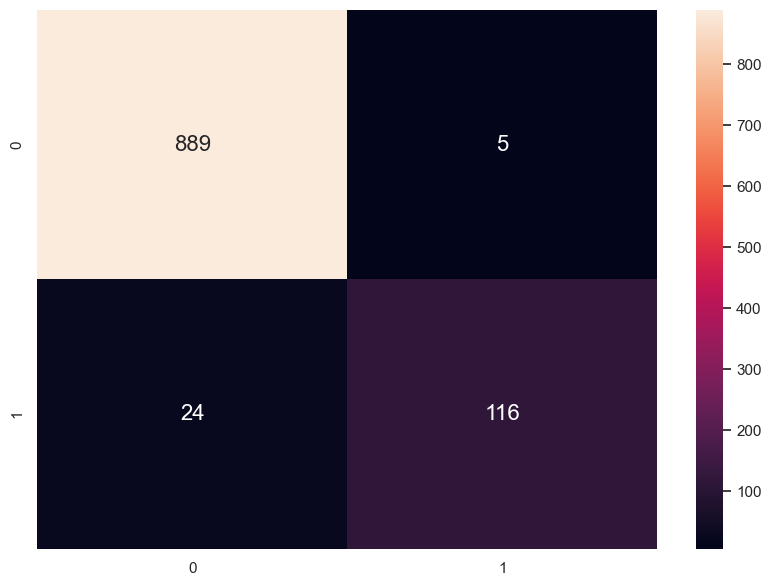

In [48]:
model = RandomForestClassifier(n_estimators=250, max_depth=25, class_weight='balanced', n_jobs=-1)
model.fit(X_train, y_train)

y_probs_train = model.predict_proba(X_train)
y_probs_test = model.predict_proba(X_test)
y_predicted_train = model.predict(X_train)
y_predicted_test = model.predict(X_test)

print_result('Random Forest', y_test, y_probs_train, y_probs_test, y_predicted_train, y_predicted_test)

# SVM 

### Optimizacija hiperparametara

In [49]:
svm_model = SVC(random_state=42)

param_dist_svm = {
    'C': [0.1, 1, 10, 100],           
    'kernel': ['linear', 'rbf'],   
    'gamma': ['scale', 'auto']  
}

random_search_svm = RandomizedSearchCV(svm_model, param_distributions=param_dist_svm, cv=5, scoring='roc_auc', random_state=42)
random_search_svm.fit(X_train, y_train)

best_svm_model = random_search_svm.best_estimator_

print("Best SVM Hyperparameters (Randomized Search):", random_search_svm.best_params_)

Best SVM Hyperparameters (Randomized Search): {'kernel': 'rbf', 'gamma': 'auto', 'C': 100}


SVM:


Accuracy Score : 
0.9729206963249516
**************************************************
Precision Score : 
0.9912280701754386
**************************************************
Recall Score : 
0.8071428571428572
**************************************************
F1 Score : 
0.889763779527559
**************************************************
Train AUC: 0.996
Test AUC: 0.990
**************************************************


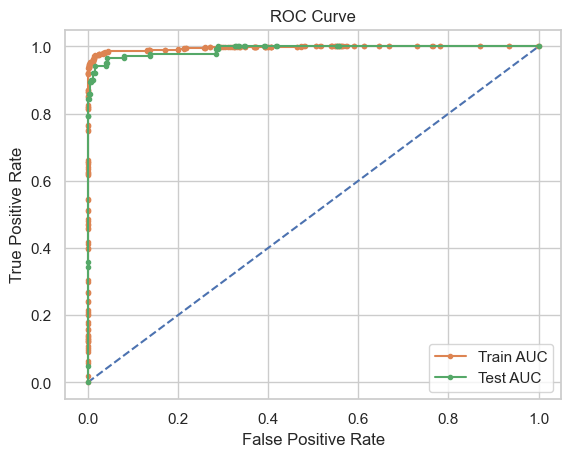

Confusion matrix:
 [[893   1]
 [ 27 113]]


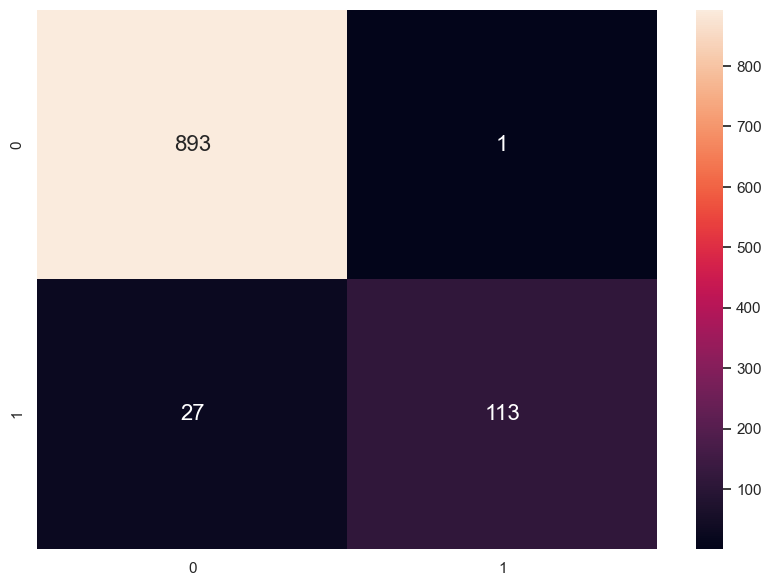

In [58]:
model = SVC(probability=True, C=100, kernel='rbf', gamma='auto')
model.fit(X_train, y_train)
y_probs_train = model.predict_proba(X_train)
y_probs_test = model.predict_proba(X_test)
y_predicted_train = model.predict(X_train)
y_predicted_test = model.predict(X_test)

print_result('SVM', y_test, y_probs_train, y_probs_test, y_predicted_train, y_predicted_test)

# Gaussian Naive Bayes

### Optimizacija hiperparametara

In [51]:
nb_model = GaussianNB()

param_dist_nb = {
    'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5]  
}

random_search_nb = RandomizedSearchCV(nb_model, param_distributions=param_dist_nb, n_iter=5, cv=5, scoring='accuracy', random_state=42)
random_search_nb.fit(X_train, y_train)

best_nb_model = random_search_nb.best_estimator_

print("Best Naive Bayes Hyperparameters (Randomized Search):", random_search_nb.best_params_)

Best Naive Bayes Hyperparameters (Randomized Search): {'var_smoothing': 1e-09}


GaussianNB:


Accuracy Score : 
0.8752417794970987
**************************************************
Precision Score : 
0.5232067510548524
**************************************************
Recall Score : 
0.8857142857142857
**************************************************
F1 Score : 
0.6578249336870027
**************************************************
Train AUC: 0.954
Test AUC: 0.880
**************************************************


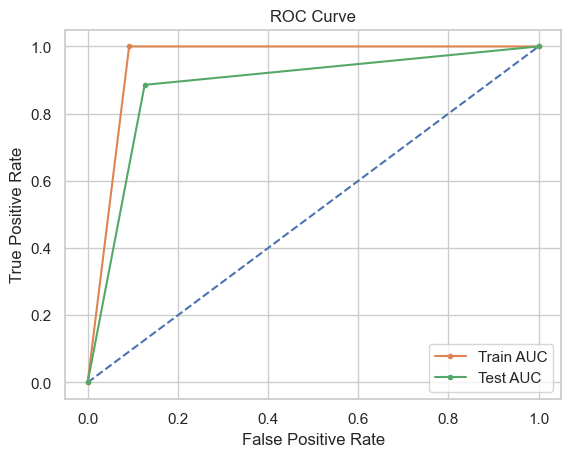

Confusion matrix:
 [[781 113]
 [ 16 124]]


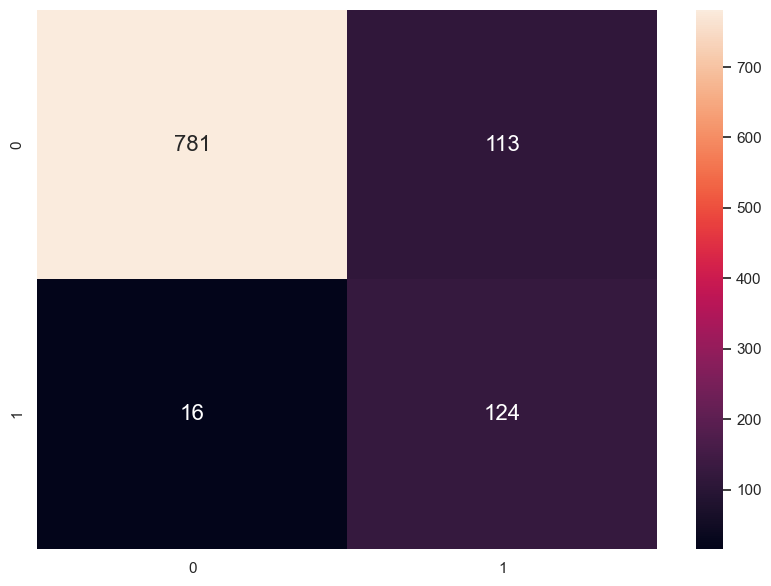

In [52]:
model = GaussianNB(var_smoothing=1e-09)
model.fit(X_train, y_train)
y_probs_train = model.predict_proba(X_train)
y_probs_test = model.predict_proba(X_test)
y_predicted_train = model.predict(X_train)
y_predicted_test = model.predict(X_test)

print_result('GaussianNB', y_test, y_probs_train, y_probs_test, y_predicted_train, y_predicted_test)

# Usporedba algoritama

## Usporedba performansi modela po osnovnim metrikama

In [53]:
df = pd.DataFrame.from_dict(scores, orient='index',
                       columns=['Accuracy', 'Precision', 'Recall', 'F1', 'AUC'])

In [54]:
df_sorted = df.sort_values(by='Accuracy', ascending=False)

In [55]:
df_sorted

,Accuracy,Precision,Recall,F1,AUC
SVM,0.979691,0.983740,0.864286,0.920152,0.988391
Logistic Regression,0.976789,0.939394,0.885714,0.911765,0.986282
Random Forest,0.971954,0.958678,0.828571,0.888889,0.979067
DecisionTree,0.957447,0.900000,0.771429,0.830769,0.827285
KNN,0.893617,0.894737,0.242857,0.382022,0.703228
GaussianNB,0.875242,0.523207,0.885714,0.657825,0.879658


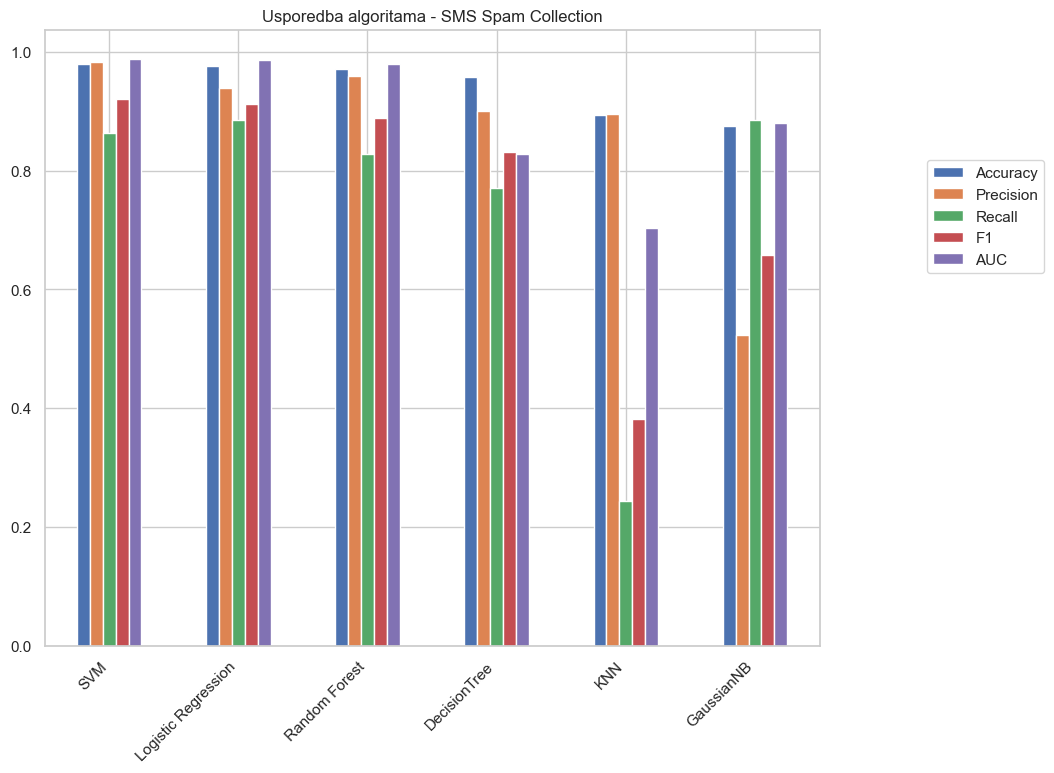

In [56]:
df_sorted.plot(y=df_sorted.columns, kind="bar", figsize=(10,8)) 
plt.xticks(rotation=45, ha='right')
plt.title("Usporedba algoritama - SMS Spam Collection")
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 0.8))

## Usporedba ROC krivulja

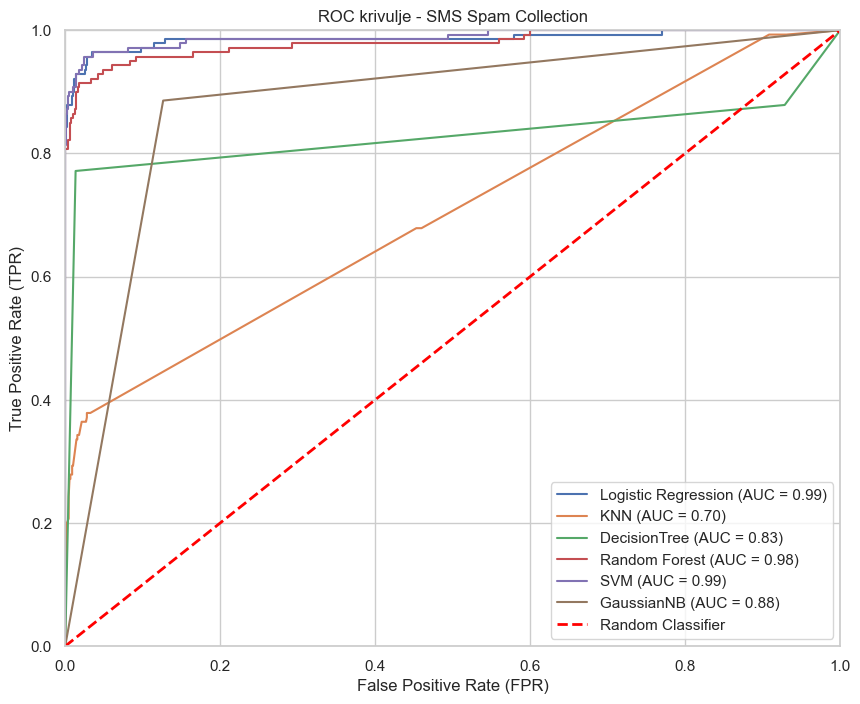

In [57]:
plt.figure(figsize=(10, 8))

for model in roc_curves:
    fpr = roc_curves[model][0]
    tpr = roc_curves[model][1]
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{model} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--', label='Random Classifier')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC krivulje - SMS Spam Collection')
plt.legend(loc='lower right')
plt.show()